In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [6]:
books = pd.read_csv('BooksDataSet.csv')
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [7]:
# removing the unnamed : 0

books = books[['book_id', 'book_name', 'genre', 'summary']]
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

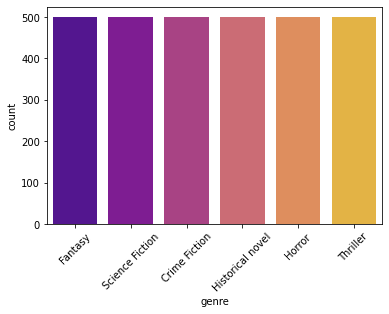

In [5]:
sn.countplot(x = books['genre'],palette='plasma')
plt.xticks(rotation = '45')

In [11]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [45]:
## cleaning the text

def cleantext(text):
    
    # removing the "\"
    
    text = re.sub("'\''","",text)
    
    # removing special symbols
    
    text = re.sub("[^a-zA-Z]"," ",text)
    
    # removing the whitespaces
    
    text = ' '.join(text.split())
    
    # convert text to lowercase
    
    text = text.lower()
    
    return text


    
books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as book opens jason awaken school bus unabl rememb is anyth past he sit next piper mclean leo valdez call name say girlfriend best friend respectively all three part class field trip grand canyon arrive classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedge in ensu fight jason surpri everyone includ himself one coin turn sword us battl storm spirits coach hedge reveal satyr fight taken captiv flee spirit after battle fli chariot arriv rescu trio one peopl it annabeth upset discov miss boyfriend perci jackson expected annabeth seek percy told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper and leo told demigod taken back camp half blood meet greek demigod child like themselves there leo reveal son hephaestus piper daughter aphrodit jason son zeus though hera tell champion jason later discov full brother zeus demigod daughter thalia grace hunter artemis shortli arrive three given quest rescu hera captured set off they soon disc

#### Plotting the most Frequent Words

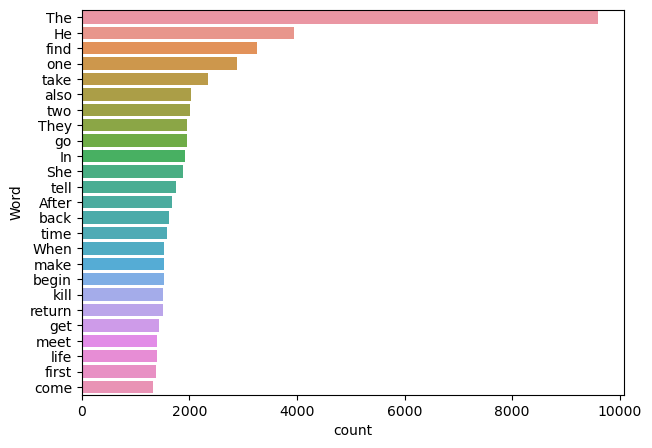

In [20]:
def mostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 25 most frequent words

wordsdf = mostfrequentwords(books['summary'],25)

In [9]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


### Removing the stopwords

Stop words are the words in a stop list  which are filtered out before or after processing of natural language data because they are insignificant

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# removing the stopwords

def removestopwords(text):
    #here we will split the text into words and check if the words are stopwords or not
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'As book opens, Jason awakens school bus, unable remember is, anything past. He sitting next Piper McLean Leo Valdez, call name say girlfriend best friend respectively. All three part class field trip Grand Canyon, arrive, classmate Dylan turn Venti (Storm Spirit) attack trio trip leader, Coach Gleeson Hedge. In ensuing fight, Jason surprise everyone, including himself, one coin turn sword us battle storm spirits. Coach Hedge, reveals satyr fight, taken captive fleeing spirit. After battle, flying chariot arrives rescue trio, one people it, Annabeth, upset discovers missing boyfriend, Percy Jackson, expected. Annabeth, seeking Percy, told vision goddess Hera look "guy one shoe", turn Jason, shoe destroyed fight. Jason, Piper,and Leo told demigod taken back Camp Half-Blood meet greek demigod child like themselves. There, Leo revealed son Hephaestus, Piper daughter Aphrodite Jason son Zeus, though Hera tell champion. Jason later discovers full brother Zeus\'s demigod daughter Thalia Grac

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Amal\AppData\Roaming\nltk_data...


True

## Lemmatizing

Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the dictionary form.

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Stemming 

 stemming is the process of reducing inflected  words to their word stem. 

In [30]:
# Approach 

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
        
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

books['summary'] = books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[1]

'as book opens, jason awaken school bus, unabl rememb is, anyth past. he sit next piper mclean leo valdez, call name say girlfriend best friend respectively. all three part class field trip grand canyon, arrive, classmat dylan turn venti (storm spirit) attack trio trip leader, coach gleeson hedge. in ensu fight, jason surpri everyone, includ himself, one coin turn sword us battl storm spirits. coach hedge, reveal satyr fight, taken captiv flee spirit. after battle, fli chariot arriv rescu trio, one peopl it, annabeth, upset discov miss boyfriend, perci jackson, expected. annabeth, seek percy, told vision goddess hera look "guy one shoe", turn jason, shoe destroy fight. jason, piper,and leo told demigod taken back camp half-blood meet greek demigod child like themselves. there, leo reveal son hephaestus, piper daughter aphrodit jason son zeus, though hera tell champion. jason later discov full brother zeus\' demigod daughter thalia grace, hunter artemis. shortli arrive, three given ques

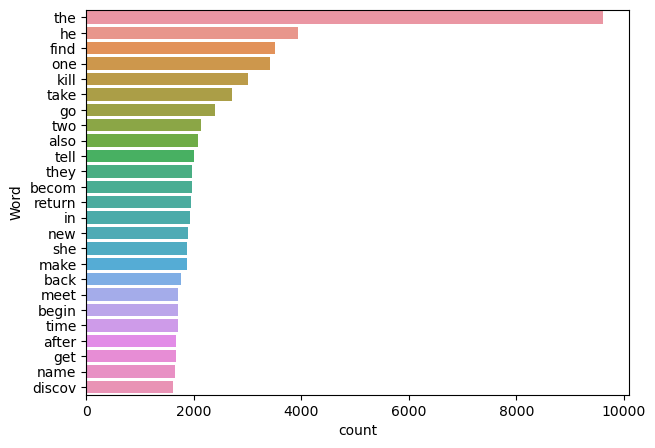

In [31]:
# visualising frewords

freq_df = showmostfrequentwords(books['summary'],25)

In [32]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
17,the,9612
214,he,3941
288,find,3502
304,one,3410
302,kill,3011
191,take,2718
156,go,2386
42,two,2130
524,also,2087
142,tell,2009


##  Encoding

In [33]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [34]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## Model Building

first we will convert the collection of summaries to a matrix of token counts.

In [35]:
## count vectorizer

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 231836 stored elements in Compressed Sparse Row format>

then split our date to train and test

In [36]:
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

# trying different models

In [37]:
svc = SVC()
svc.fit(X_train,y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,svccpred))

0.5566666666666666


In [38]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.6216666666666667


In [39]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,rf.predict(X_test)))

0.5916666666666667


As we can see the results are not very convincing. So we will try TFDIF.

## Part 2 Model Building

 + Changing from Countvectorizer to TFDIF vectorizer

In [40]:
#Labeling each 'genre' with an unique number 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

X_train,X_test,y_train,y_test = train_test_split(books['summary']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((2400,), (600,))

In [41]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [42]:
svc = SVC()
svc.fit(xtrain_tfidf,y_train)
svccpred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,svccpred))

0.7666666666666667


In [43]:
mb = MultinomialNB()
mb.fit(xtrain_tfidf,y_train)
mbpred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))

0.7766666666666666


As we can see MultinominalNb model applied after TFIDF have the best results.

## Testing the Model

In [46]:
def test(text,model):
    
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted



ans = books['summary'].apply(lambda text:test(text,mb))

# printing the 
# print(list(mapper.keys())[list(mapper.values()).index(ans)])

ans

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [1]
2996    [5]
2997    [5]
2998    [5]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [48]:
predicted_genres = []
for i in range(len(ans)):
    
    index_val = ans[i][0]
    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])
    

In [49]:
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [50]:
## mapping the training genre as well

newmap = dict([(value,key) for key,value in mapper.items()])
newmap

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [51]:
print(newmap)

{0: 'Fantasy', 1: 'Science Fiction', 2: 'Crime Fiction', 3: 'Historical novel', 4: 'Horror', 5: 'Thriller'}


In [52]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted_genre'] = np.array(predicted_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first trust among morrow day a...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,as book opens jason awaken school bus unabl re...,Fantasy,Fantasy
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,the book open herald mag vanyel return countri...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [53]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first trust among morrow day a...,Fantasy,Fantasy
1,The Lost Hero,as book opens jason awaken school bus unabl re...,Fantasy,Fantasy
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,the book open herald mag vanyel return countri...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,a novel numa files a kurt austin adventure in ...,Thriller,Science Fiction
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,how know deep davey alway live shadow older br...,Thriller,Thriller
2998,The Rainbow and the Rose,the stori concern life johnni pascoe retir com...,Thriller,Thriller


In [54]:
dict(Counter(books['Actual Genre'].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [55]:
dict(Counter(books['Predicted_genre'].values))

{'Fantasy': 462,
 'Science Fiction': 534,
 'Thriller': 484,
 'Horror': 492,
 'Historical novel': 513,
 'Crime Fiction': 515}

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Historical novel'),
  Text(5, 0, 'Crime Fiction')])

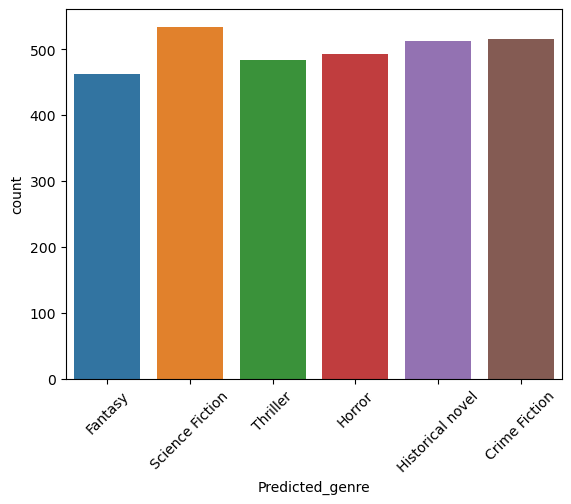

In [56]:
sn.countplot(x = books['Predicted_genre'])
plt.xticks(rotation = '45')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

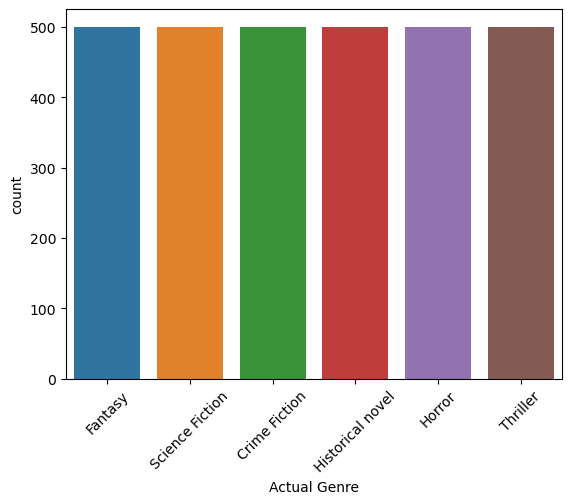

In [57]:
sn.countplot(x = books['Actual Genre'])
plt.xticks(rotation = '45')

In [58]:
# saving the model

import pickle
file = open('bookgenremodel.pkl','wb')
pickle.dump(mb,file)
file.close()

In [59]:
books['summary'].iloc[1]

'as book opens jason awaken school bus unabl rememb is anyth past he sit next piper mclean leo valdez call name say girlfriend best friend respectively all three part class field trip grand canyon arrive classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedge in ensu fight jason surpri everyone includ himself one coin turn sword us battl storm spirits coach hedge reveal satyr fight taken captiv flee spirit after battle fli chariot arriv rescu trio one peopl it annabeth upset discov miss boyfriend perci jackson expected annabeth seek percy told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper and leo told demigod taken back camp half blood meet greek demigod child like themselves there leo reveal son hephaestus piper daughter aphrodit jason son zeus though hera tell champion jason later discov full brother zeus demigod daughter thalia grace hunter artemis shortli arrive three given quest rescu hera captured set off they soon disc

In [60]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000)

In [61]:
file = open('tfdifvector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()

In [62]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

[nltk_data] Downloading package wordnet to ./...


True

In [63]:
nltk.download('stopwords',download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Unzipping corpora\stopwords.zip.


True